# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

wymiar obrazka : (150, 150)


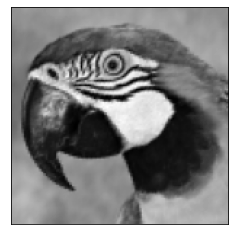

wymiar obrazka : (250, 250)


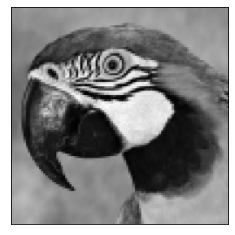

wymiar obrazka : (150, 250)


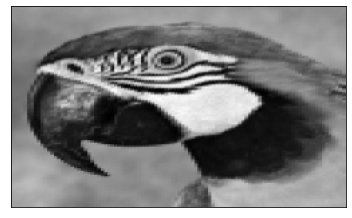

wymiar obrazka : (50, 50)


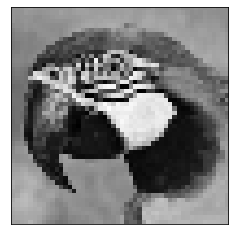

wymiar obrazka : (100, 82)


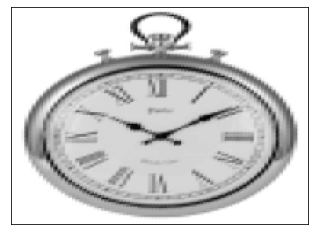

powiększanie z interpolacją dwuliniowa


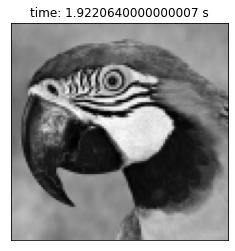

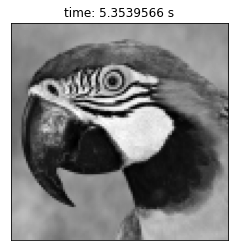

pomniejszanie z interpolacją dwuliniowa


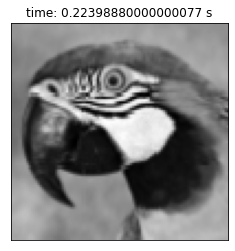

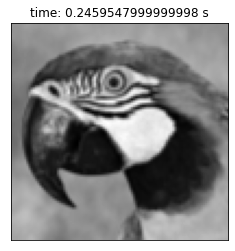

powiększanie z interpolacją bicubic


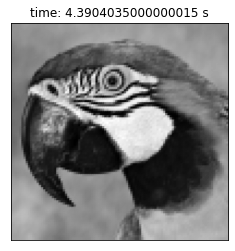

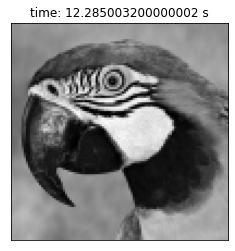

pomniejszanie z interpolacją bicubic


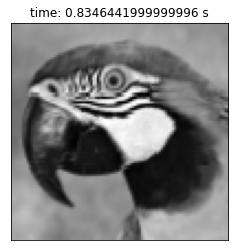

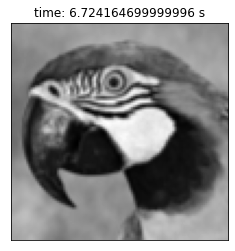

In [1]:
#TODO Do samodzielnej implementacji
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate
if not os.path.exists("clock.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/clock.bmp --no-check-certificate 
#import ainvert
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from timeit import default_timer as timer

a_invert = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1],
[4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1],
])

def two_linear_int(img, vertical_scalar : float, horizontal_scalar : float):
    res = np.zeros([int(round(vertical_scalar*img.shape[0])), int(round(horizontal_scalar*img.shape[1]))],dtype = "uint8")
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            i1 = int(np.floor(i/(vertical_scalar))) if int(np.floor(i/(vertical_scalar))) < img.shape[0] else img.shape[0]-1
            j1 = int(np.floor(j/(horizontal_scalar))) if int(np.floor(j/(horizontal_scalar))) < img.shape[1] else img.shape[1]-1
            i1_1 = int(np.floor((i+1)/(vertical_scalar))) if int(np.floor((i+1)/(vertical_scalar))) < img.shape[0] else img.shape[0]-1
            j1_1 = int(np.floor((j+1)/(horizontal_scalar))) if int(np.floor((j+1)/(horizontal_scalar))) < img.shape[1] else img.shape[1]-1
            res[i][j] = 0
            ilen = i/(vertical_scalar) - np.floor(i/(vertical_scalar))
            jlen = j/(horizontal_scalar) - np.floor(j/(horizontal_scalar))
            A = img[i1, j1]
            B = img[i1, j1_1 ]
            C = img[i1_1 , j1_1 ]
            D = img[i1_1 , j1]
            res[i][j] = int((np.array([1-jlen,jlen])@np.array([[A,D],[B,C]])@np.array([[1-ilen],[ilen]]))[0])
            #
    return res


def two_wall_interpolation(img, vertical_scalar : float, horizontal_scalar : float):
    res = np.zeros([int(round(vertical_scalar*img.shape[0])), int(round(horizontal_scalar*img.shape[1]))],dtype = "uint8")
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            i1 = int(np.floor(i/(vertical_scalar))) if int(np.floor(i/(vertical_scalar))) < img.shape[0] else img.shape[0]-1
            j1 = int(np.floor(j/(horizontal_scalar))) if int(np.floor(j/(horizontal_scalar))) < img.shape[1] else img.shape[1]-1
            i1_1 = int(np.floor((i+1)/(vertical_scalar))) if int(np.floor((i+1)/(vertical_scalar))) < img.shape[0] else img.shape[0]-1
            j1_1 = int(np.floor((j+1)/(horizontal_scalar))) if int(np.floor((j+1)/(horizontal_scalar))) < img.shape[1] else img.shape[1]-1
            i1_2 = int(np.floor((i+2)/(vertical_scalar))) if int(np.floor((i+2)/(vertical_scalar))) < img.shape[0] else img.shape[0]-1
            j1_2 = int(np.floor((j+2)/(horizontal_scalar))) if int(np.floor((j+2)/(horizontal_scalar))) < img.shape[1] else img.shape[1]-1
            i1__1 = int(np.floor((i-1)/(vertical_scalar))) if int(np.floor((i-1)/(vertical_scalar))) > 0 else 0
            j1__1 = int(np.floor((j-1)/(horizontal_scalar))) if int(np.floor((j-1)/(horizontal_scalar))) > 0 else 0
            res[i][j] = 0
            ilen = i/(vertical_scalar) - np.floor(i/(vertical_scalar))
            jlen = j/(horizontal_scalar) - np.floor(j/(horizontal_scalar))
            A = img[i1, j1]
            B = img[i1, j1_1]
            C = img[i1_1, j1_1]
            D = img[i1_1, j1]
            img = img.astype(float)
            A_x = float(img[i1_1,j1] - img[i1__1,j1])/2
            B_x = float(img[i1_1,j1_1] - img[i1__1,j1_1])/2
            C_x = float(img[i1_2,j1_1] - img[i1,j1_1])/2
            D_x = float(img[i1_2,j1] - img[i1,j1])/2
            A_y =  float(img[i1,j1_1] - img[i1,j1__1])/2
            B_y = float(img[i1,j1_2] - img[i1,j1])/2
            C_y = float(img[i1_1,j1_2] - img[i1_1,j1])/2
            D_y = float(img[i1_1,j1_1] - img[i1_1,j1__1])/2
            A_xy = float(img[i1, j1] + img[i1_1, j1_1] - img[i1__1, j1] -img[i1, j1__1])/4
            B_xy = float(img[i1, j1_1] + img[i1_1, j1_2] - img[i1__1, j1] -img[i1, j1])/4
            C_xy = float(img[i1_1, j1_1] + img[i1_2, j1_2] - img[i1, j1_1] -img[i1_1, j1])/4
            D_xy = float(img[i1_1, j1] + img[i1_2, j1_1] - img[i1, j1] -img[i1_1, j1__1])/4
            x = np.array([A,B,D,C,A_x,B_x,D_x,C_x,A_y,B_y,D_y,C_y,A_xy,B_xy,D_xy,C_xy])
            a= a_invert@(x.T)
            a_temp = a.reshape([4,4])
            y = np.array([pow(ilen, i)  for i in range(4)])
            x = np.array([pow(jlen, j)  for j in range(4)])
            res[i][j] = l if 0<(l:=y@a_temp@(x.T))<255 else 0 if l<=0 else 255
    return res
I = cv2.imread('parrot.bmp')           # Read image
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
for i in [(1.5,1.5),(2.5,2.5),(1.5,2.5), (0.5,0.5)]:
    img=two_wall_interpolation(I, i[0], i[1])
    plt.imshow(img, cmap ="gray")
    print(f"wymiar obrazka : {img.shape}")
    plt.xticks([])
    plt.yticks([])
    plt.show()
clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY)
img = two_wall_interpolation(clock, 1.5, 2.5)
plt.imshow(img, cmap ="gray")
print(f"wymiar obrazka : {clock.shape}")
plt.xticks([])
plt.yticks([])
plt.show()
def test_bicubic(img,vertical_scalar : float, horizontal_scalar : float ,interpolation =cv2.INTER_NEAREST):
    start=timer()
    res=two_wall_interpolation(img,horizontal_scalar,vertical_scalar)
    end=timer()
    time=end-start
    plt.imshow(res, cmap ="gray")
    plt.title(f"time: {time} s")
    plt.xticks([]) 
    plt.yticks([])
    plt.show()
def test_dual(img,vertical_scalar : float, horizontal_scalar : float ,interpolation =cv2.INTER_NEAREST):
    start=timer()
    res=two_linear_int(img,horizontal_scalar,vertical_scalar)
    end=timer()
    time=end-start
    plt.imshow(res, cmap ="gray")
    plt.title(f"time: {time} s")
    plt.xticks([]) 
    plt.yticks([])
    plt.show()
print("powiększanie z interpolacją dwuliniowa")
test_dual(I,3,3)
test_dual(I,5,5)
print("pomniejszanie z interpolacją dwuliniowa")
test_dual(cv2.resize(I,(int(I.shape[1]*3),int(I.shape[0]*3)),cv2.INTER_NEAREST),0.33,0.33)
test_dual(cv2.resize(I,(int(I.shape[1]*5),int(I.shape[0]*5)),cv2.INTER_CUBIC),0.2,0.2)
print("powiększanie z interpolacją bicubic")
test_bicubic(I,3,3)
test_bicubic(I,5,5)
print("pomniejszanie z interpolacją bicubic")
test_bicubic(cv2.resize(I,(int(I.shape[1]*3),int(I.shape[0]*3)),cv2.INTER_NEAREST),0.33,0.33)
test_bicubic(cv2.resize(I,(int(I.shape[1]*5),int(I.shape[0]*5)),cv2.INTER_CUBIC),0.2,0.2)

widać po testach czasowych że interpolacja dwusześcienna jest dużo bardziej zasobochłonna niż interpolacja dwuliniowa